In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.utils import shuffle
from torch.autograd import Variable
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
diab  = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ТАДМО/кр/diabetes.csv")

In [ ]:
diab.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

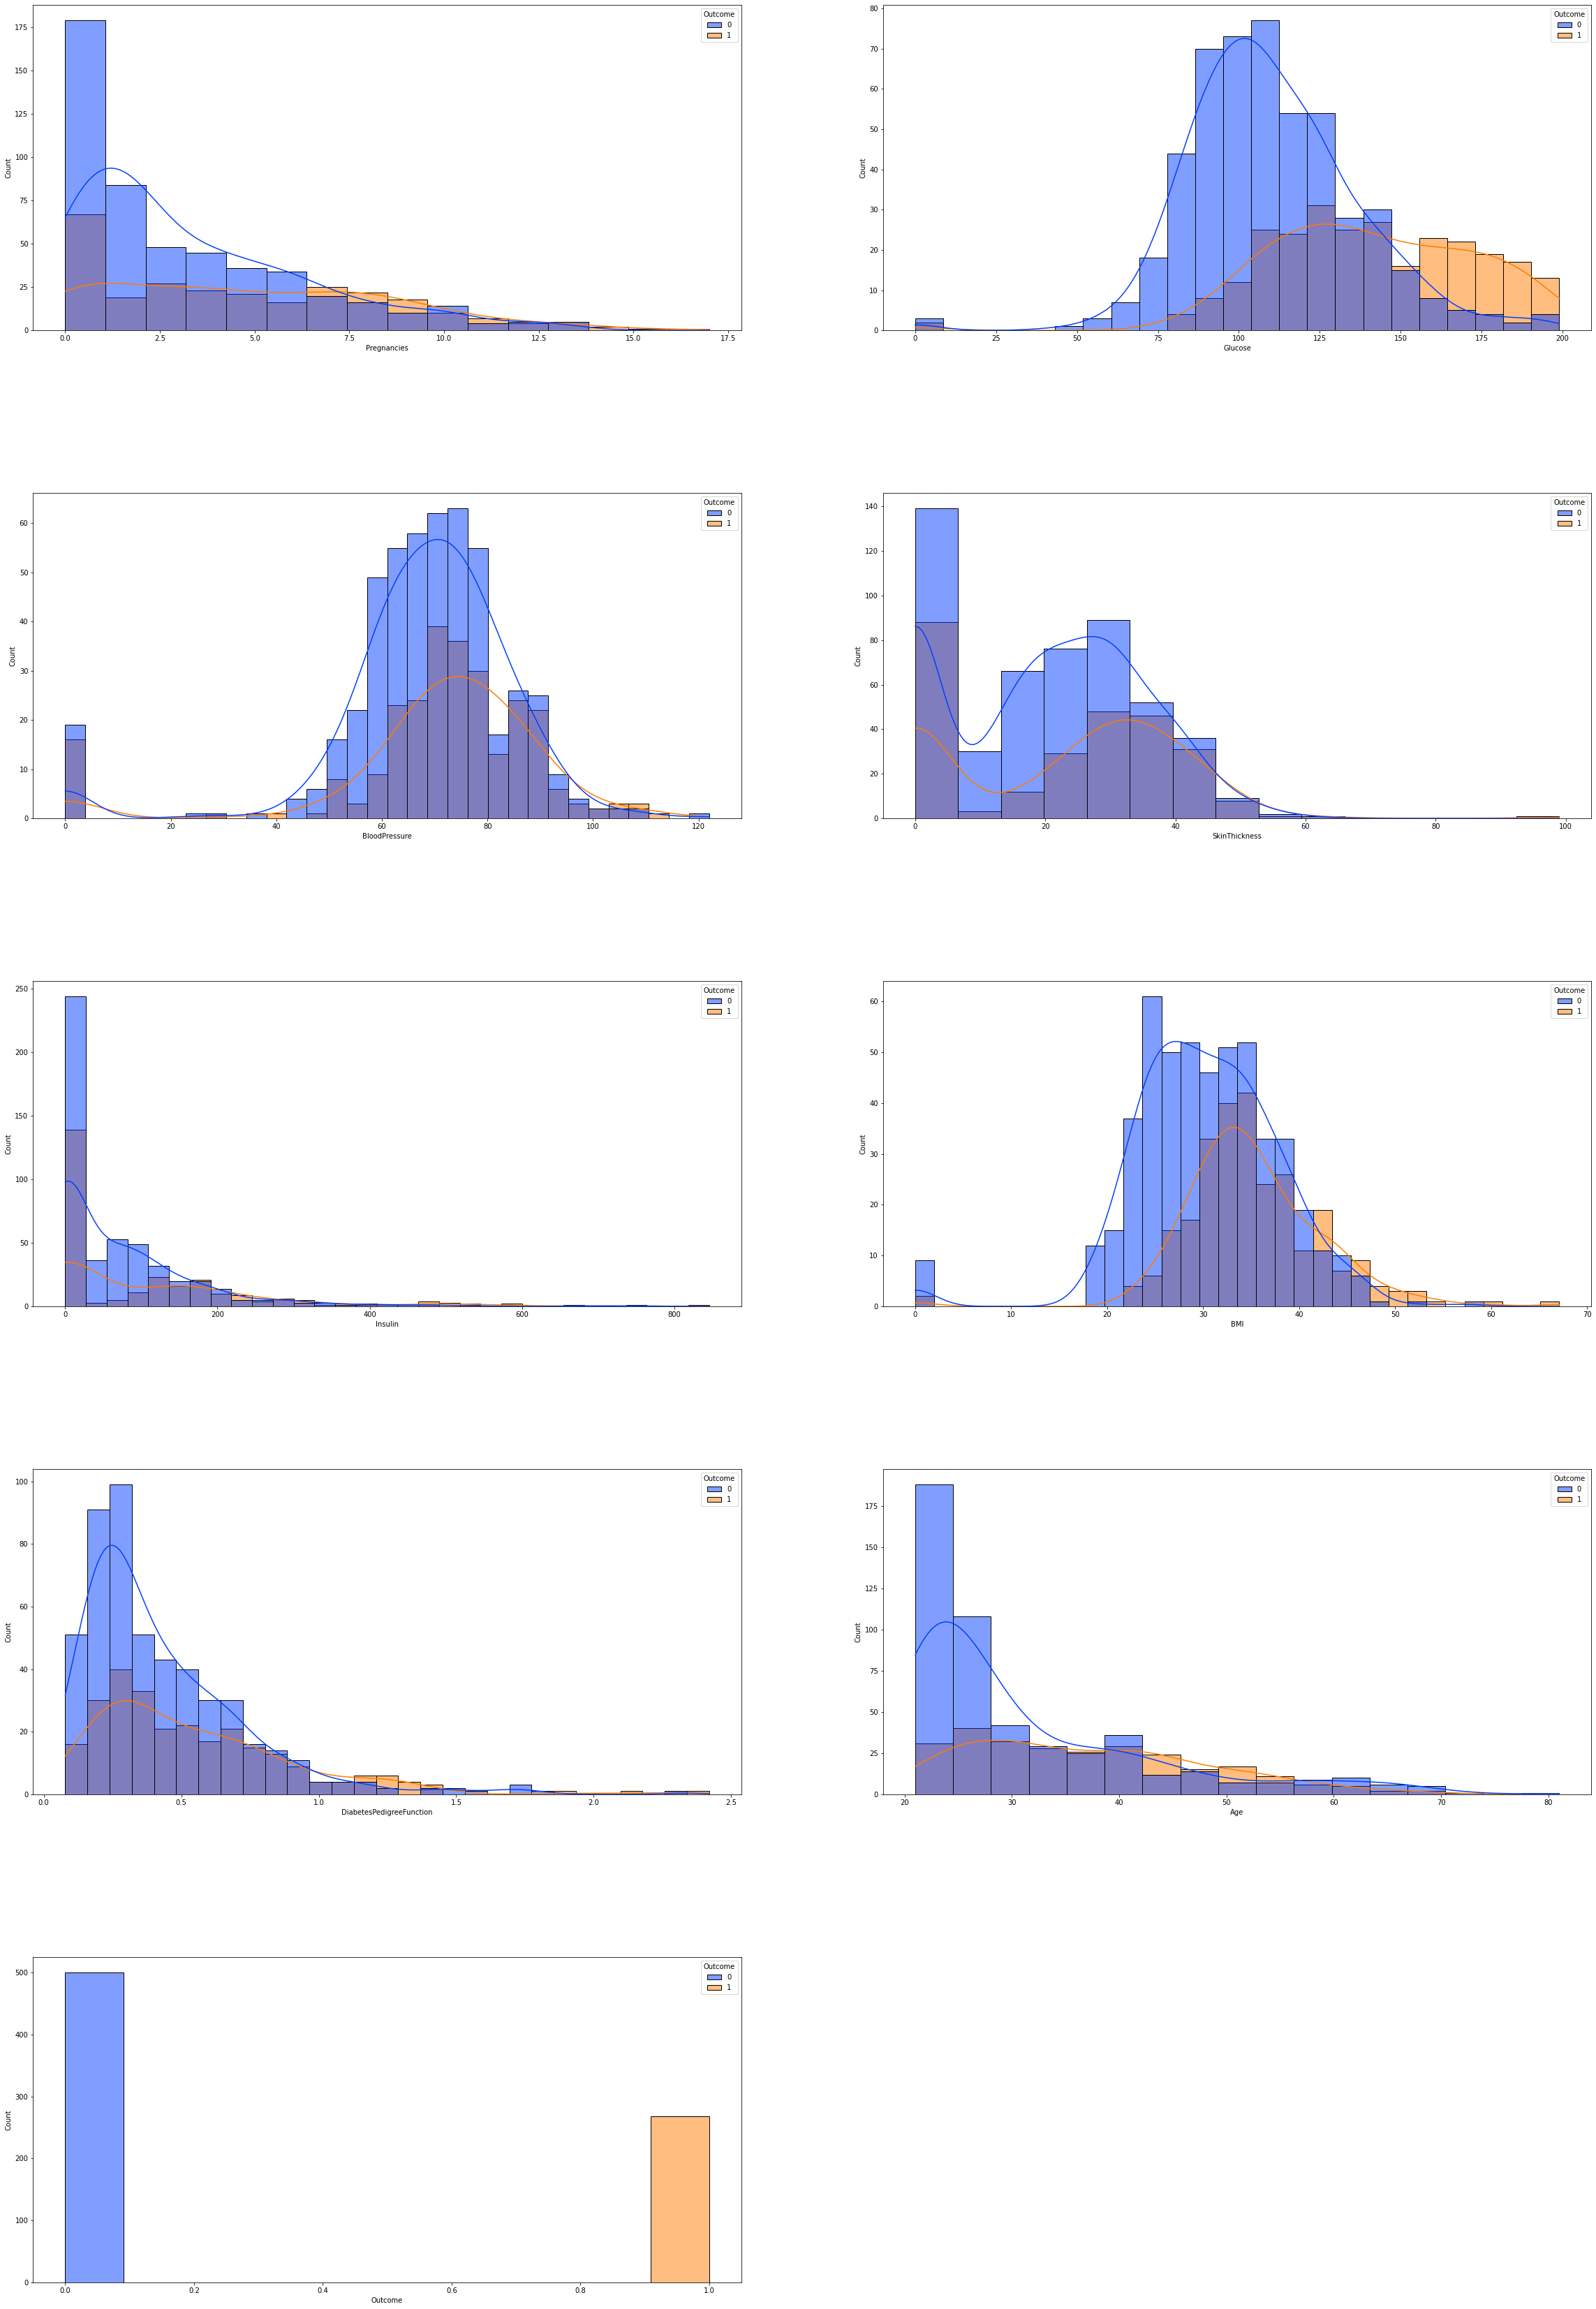

In [ ]:
rcParams['figure.figsize'] = 40,60
plt.subplots_adjust(hspace=0.5)
i = 1;
sns.set_palette("bright")
for name in diab:
    plt.subplot(5,2,i)
    sns.histplot(data=diab, x=name, hue="Outcome",kde=True)
    i += 1

In [ ]:
X = diab.drop('Outcome' , axis = 1) #independent Feature
y = diab['Outcome'] #dependent Feature

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size =0.2,random_state=0)

In [ ]:
X_train=torch.FloatTensor(X_train.values)

y_train=torch.LongTensor(y_train.values)

X_test=torch.FloatTensor(X_test.values)

y_test=torch.LongTensor(y_test.values)


In [ ]:
#Creating the Model
class ANN_model(nn.Module):
    def __init__(self,input_features=8,hidden1=20, hidden2=10,out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features,hidden1)
        self.f_connected2 = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2,out_features)
        
    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [ ]:
torch.manual_seed(32)
model = ANN_model()

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
epochs=460
final_losses=[]
for i in range(epochs):
    i= i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i % 10 == 1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 2.146881103515625
Epoch number: 11 and the loss : 0.6394357681274414
Epoch number: 21 and the loss : 0.6082317233085632
Epoch number: 31 and the loss : 0.5859763026237488
Epoch number: 41 and the loss : 0.5721114277839661
Epoch number: 51 and the loss : 0.568753719329834
Epoch number: 61 and the loss : 0.5601367354393005
Epoch number: 71 and the loss : 0.5530797839164734
Epoch number: 81 and the loss : 0.5553196668624878
Epoch number: 91 and the loss : 0.544568657875061
Epoch number: 101 and the loss : 0.5416419506072998
Epoch number: 111 and the loss : 0.5433723330497742
Epoch number: 121 and the loss : 0.5312328934669495
Epoch number: 131 and the loss : 0.5264348387718201
Epoch number: 141 and the loss : 0.5240440368652344
Epoch number: 151 and the loss : 0.5155556201934814
Epoch number: 161 and the loss : 0.5037665367126465
Epoch number: 171 and the loss : 0.5130395293235779
Epoch number: 181 and the loss : 0.4960537254810333
Epoch number: 191 and the 

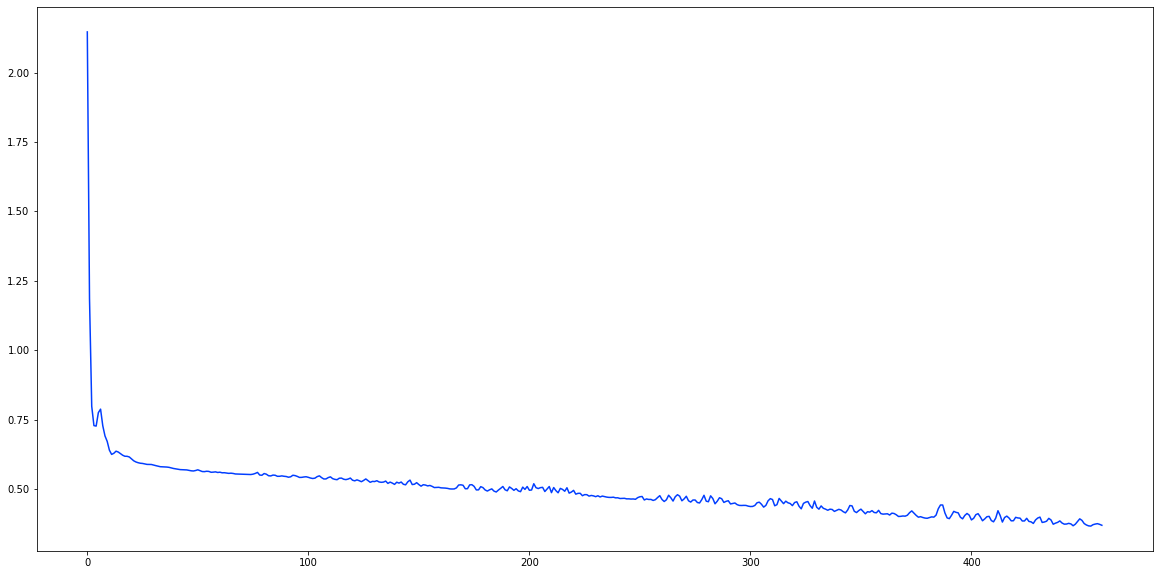

In [ ]:
rcParams['figure.figsize'] = 20,10
with torch.no_grad():
   graph_x = range(epochs)
   graph_y = final_losses

   plt.plot(graph_x, graph_y)
   plt.show()

In [ ]:
predictions = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())

Text(0, 0.5, 'Predicted')

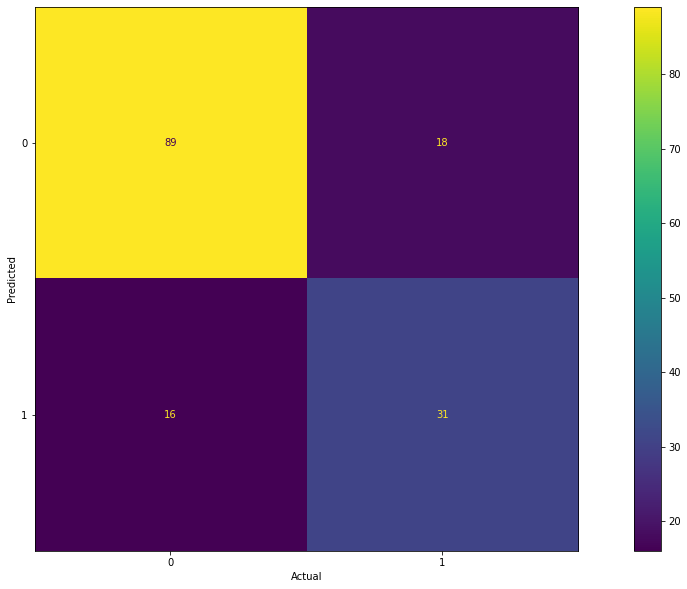

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predictions)).plot()
rcParams['figure.figsize'] = 10,10
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [ ]:
acc = accuracy_score(y_test , predictions)
print(acc)

0.7792207792207793


In [ ]:
#Accuracy ----------- epoch
#0.6623376623376623 - 110
#0.7922077922077922 - 510
#0.7792207792207793 - 1010
#0.7467532467532467 - 10100